### Explorartory Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:")
display(missing)


Missing values per column:


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

### Data Visualization 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


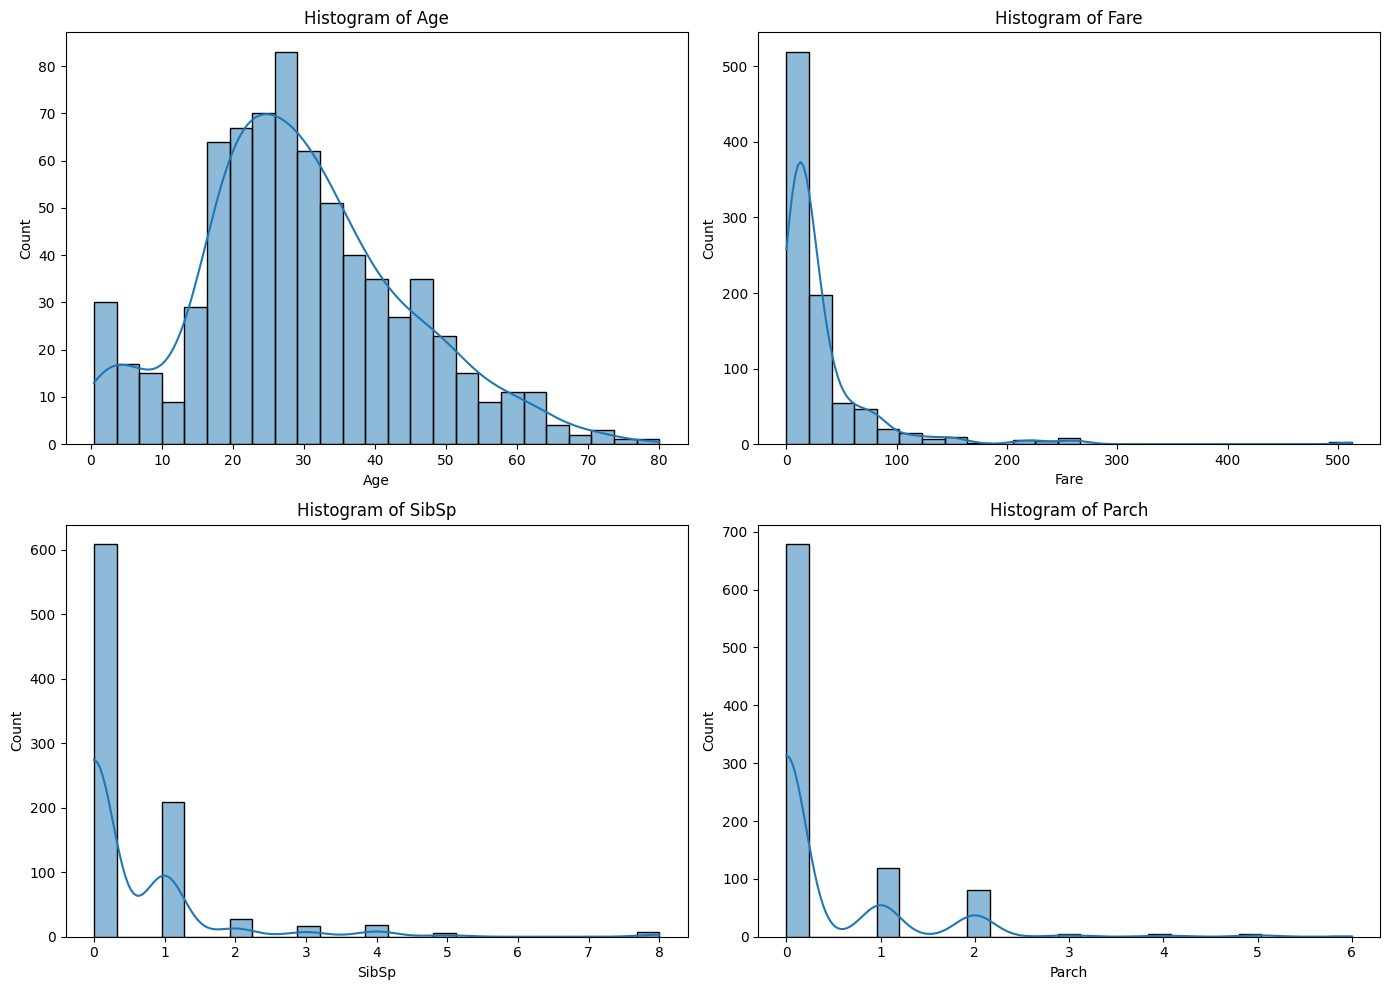

In [13]:
# Step 2: Histograms & Boxplots for numeric features
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Histograms
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, bins=25, ax=ax)
    ax.set_title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

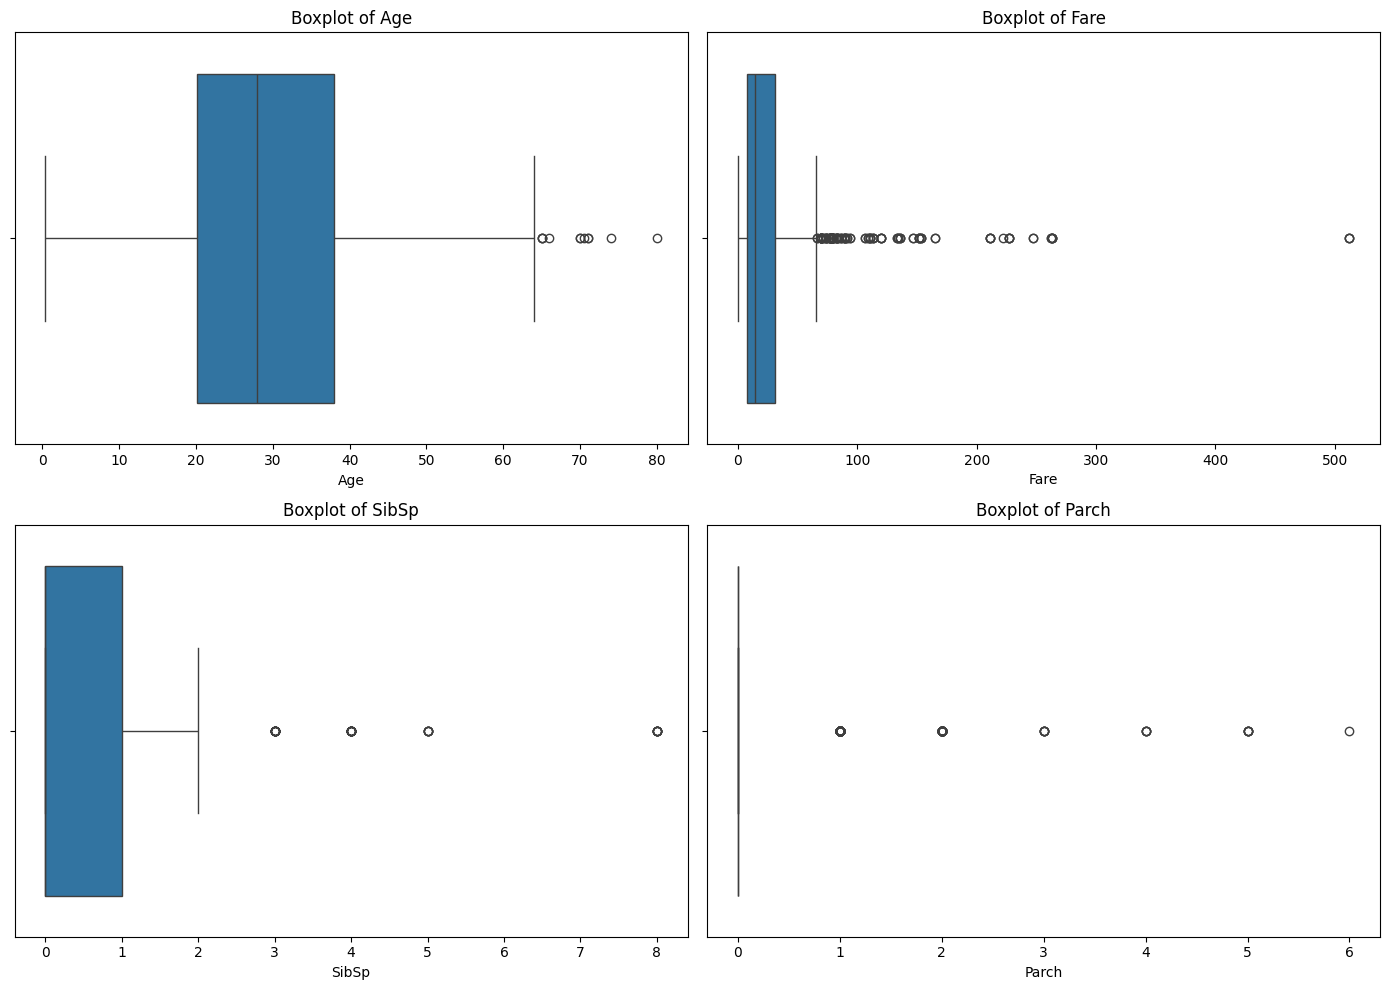

In [14]:
# Boxplots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

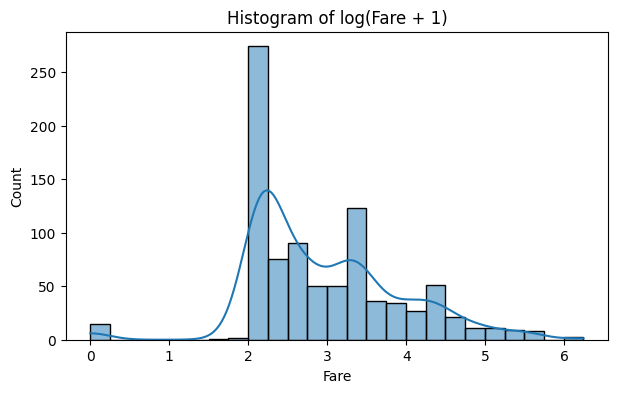

In [15]:
# Optional: log transform histogram for skewed features (e.g., Fare)
plt.figure(figsize=(7,4))
sns.histplot(np.log1p(df['Fare'].dropna()), bins=25, kde=True)
plt.title("Histogram of log(Fare + 1)")
plt.show()

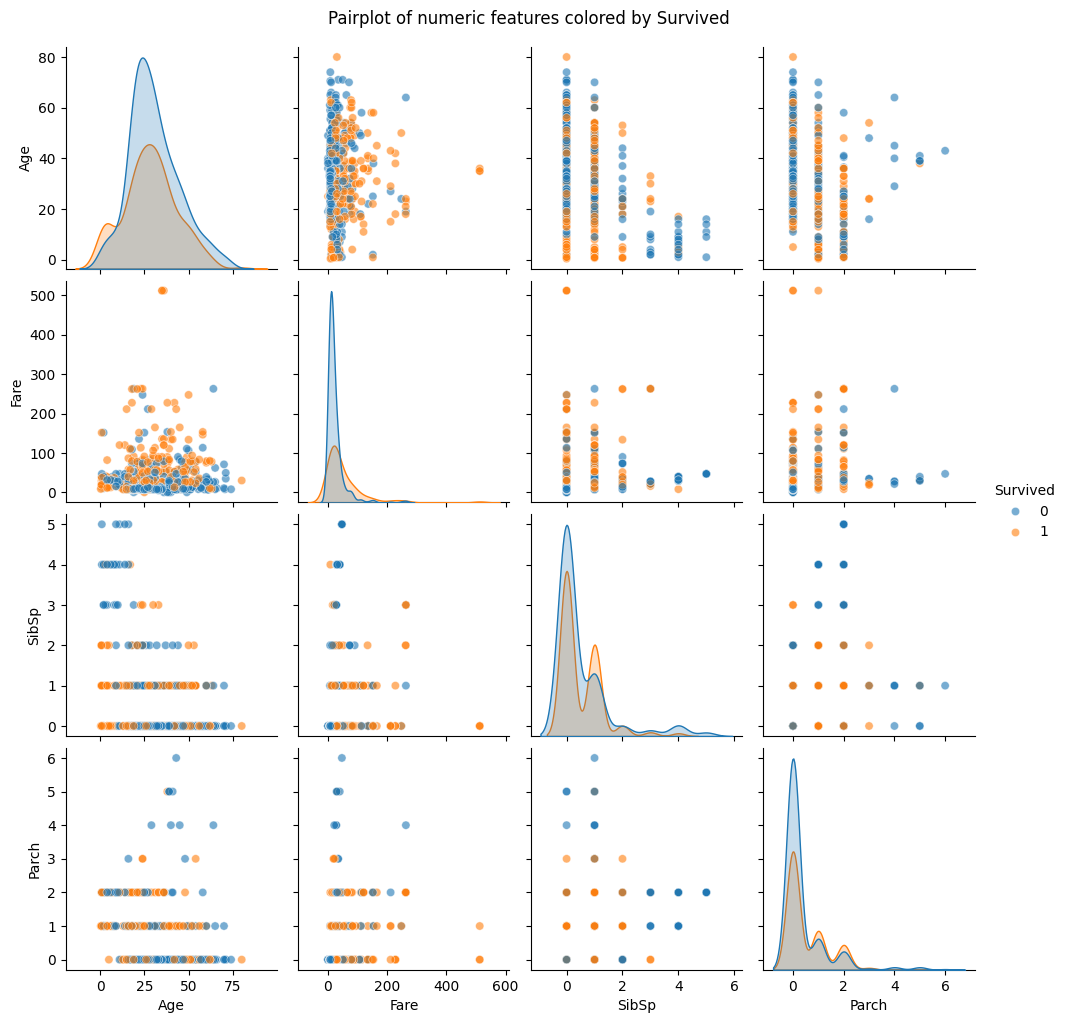

In [17]:
pair_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
# Pairplot (colored by Survived). Note: this can be heavy if dataset is large.
sns.pairplot(df[pair_cols].dropna(), hue='Survived', diag_kind='kde', corner=False, plot_kws={'alpha':0.6})
plt.suptitle("Pairplot of numeric features colored by Survived", y=1.02)
plt.show()

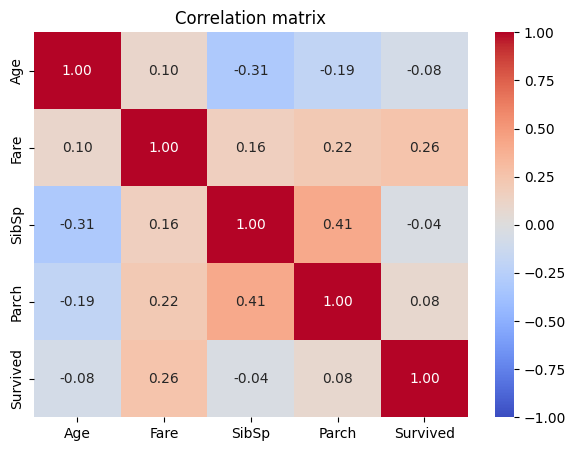

In [18]:
# Correlation matrix (numeric)
corr = df[pair_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

In [19]:
print("\nCorrelation values:")
display(corr)


Correlation values:


,Age,Fare,SibSp,Parch,Survived
Age,1.000000,0.096067,-0.308247,-0.189119,-0.077221
Fare,0.096067,1.000000,0.159651,0.216225,0.257307
SibSp,-0.308247,0.159651,1.000000,0.414838,-0.035322
Parch,-0.189119,0.216225,0.414838,1.000000,0.081629
Survived,-0.077221,0.257307,-0.035322,0.081629,1.000000


### Summary

1. Women and Children had preferential rescue access.
2. Wealthier passengers(1st Class) had significantly higher survival rates.
3. Cabin location likely influenced survival chances as those who had their cabins in corners or in deep, their survival chances were likely low.


Recommendation: Ensure balanced lifeboat access regardless of ticket class.